In [1]:
import pandas as pd
import numpy as np

In [2]:
df_1 = pd.read_parquet('./heir_raw.parquet')

In [7]:
df_2 = pd.read_parquet('./actual.parquet')

In [8]:
df_2

,actual
0,0
1,0
2,0
3,1
4,1
...,...
67186,1
67187,0
67188,0
67189,1


In [3]:
df_1

,MONTH,WEEK_NUM,cntincpaycont9m_3716944L,cntpmts24_3658933L,commnoinclast6m_3546845L,eir_270L,interestrate_311L,lastapprcredamount_781A,lastrejectcredamount_222A,maininc_215A,...,disbursementtype_67L,isbidproduct_1095L,lastapprcommoditycat_1041M,lastapprcommoditytypec_5251766M,lastcancelreason_561M,lastrejectcommoditycat_161M,lastrejectcommodtypec_5251769M,lastrejectreason_759M,lastrejectreasonclient_4145040M,previouscontdistrict_112M
case_id,,,,,,,,,,,,,,,,,,,,,
105588.0,201901.0,2.0,0.138437,-0.123999,0.0,0.934709,0.894569,2.095303,-0.616854,0.788424,...,1.0,0.0,33.0,85.0,57.0,35.0,84.0,17.0,10.0,136.0
2608648.0,201908.0,32.0,-0.731513,-0.885906,0.0,0.771123,0.728891,0.115756,0.600801,-0.829664,...,1.0,1.0,33.0,85.0,57.0,35.0,84.0,17.0,10.0,8.0
2583138.0,201906.0,23.0,0.660408,2.288709,0.0,0.771123,0.728891,2.095303,-0.089203,2.049867,...,1.0,1.0,33.0,85.0,18.0,35.0,84.0,17.0,10.0,171.0
1358817.0,201905.0,17.0,-0.731513,-0.758922,0.0,0.825652,0.784117,-0.370647,-0.464485,-0.272336,...,2.0,0.0,6.0,85.0,57.0,29.0,84.0,15.0,9.0,168.0
1314891.0,201903.0,11.0,0.834398,0.256955,0.0,0.607537,0.563213,-0.376868,-0.616854,-0.243666,...,2.0,0.0,6.0,85.0,57.0,35.0,84.0,17.0,10.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214133.0,202003.0,61.0,1.182378,0.256955,0.0,0.934709,0.894569,1.360043,0.194916,0.845762,...,1.0,0.0,33.0,85.0,52.0,35.0,84.0,7.0,9.0,25.0
749026.0,201907.0,28.0,-0.731513,-0.885906,0.0,0.607537,0.563213,-0.732621,-0.616854,-0.931727,...,2.0,0.0,33.0,85.0,57.0,35.0,84.0,17.0,10.0,221.0
1770557.0,202002.0,56.0,1.182378,0.129970,0.0,0.607537,0.563213,-0.280153,-0.616854,0.215040,...,2.0,0.0,33.0,85.0,57.0,35.0,84.0,17.0,10.0,35.0


In [4]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt



In [5]:
df_1.shape

(67191, 120)

In [42]:
db = DBSCAN(eps=40, min_samples=240).fit(df_1)

In [43]:
cluster_labels = db.labels_

In [44]:
cluster_labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [45]:
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Exclude noise points


In [46]:
n_clusters

2

In [47]:
len(cluster_labels)

67191

In [48]:
cluster_labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [52]:
y_labels = pd.DataFrame({'pred': cluster_labels})

In [53]:
y_labels

,pred
0,0
1,0
2,0
3,0
4,0
...,...
67186,1
67187,0
67188,1
67189,0


In [55]:
df_2

,actual
0,0
1,0
2,0
3,1
4,1
...,...
67186,1
67187,0
67188,0
67189,1


In [60]:
df_results = pd.concat([y_labels, df_2], axis=1, join="inner")

In [62]:
df_filtered = df_results[df_results['pred'] != -1]

In [63]:
df_filtered

,pred,actual
0,0,0
1,0,0
2,0,0
3,0,1
4,0,1
...,...,...
67186,1,1
67187,0,0
67188,1,0
67189,0,1


In [64]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [66]:
predicted = df_filtered['pred']
actual = df_filtered['actual']

In [67]:
# Calculating accuracy
accuracy = accuracy_score(actual, predicted)

# Calculating precision
precision = precision_score(actual, predicted, average='weighted')

# Calculating recall
recall = recall_score(actual, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5077434124882165
Precision: 0.509093002851205
Recall: 0.5077434124882165


In [39]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

In [40]:
neighbors = NearestNeighbors(n_neighbors=240)
neighbors_fit = neighbors.fit(df_1)
distances, indices = neighbors_fit.kneighbors(df_1)

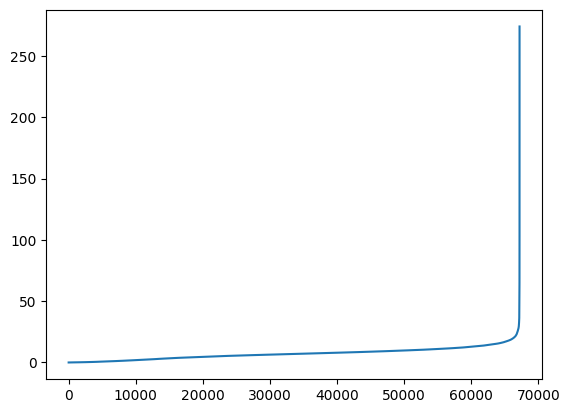

In [41]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [80]:
df_formatted = df_1.reset_index(inplace=False).drop(columns=['case_id'], inplace=False)

In [84]:
focused_raw = df_formatted.iloc[predicted.index]

In [85]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(focused_raw, predicted)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3438706596745518


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [87]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(focused_raw)

In [97]:
numped_arry = predicted.to_numpy()

In [99]:
numped_arry

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

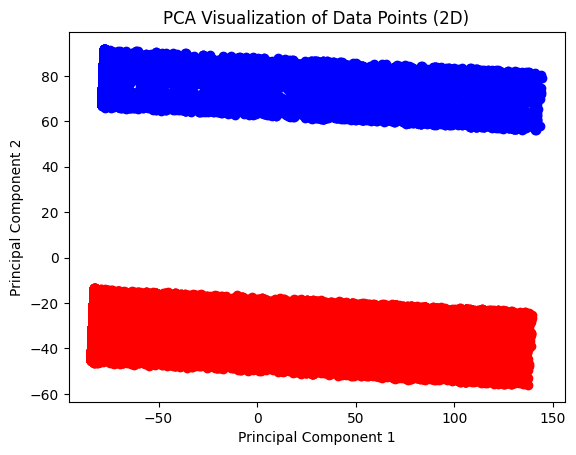

In [100]:
plt.scatter(reduced_data[numped_arry == 0, 0], reduced_data[numped_arry == 0, 1], color='red', label='Class 0')
plt.scatter(reduced_data[numped_arry == 1, 0], reduced_data[numped_arry == 1, 1], color='blue', label='Class 1')
plt.title('PCA Visualization of Data Points (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [91]:
reduced_data

array([[  0.7953523 , -47.97914314],
       [129.24473503, -35.3114628 ],
       [-33.00781016, -32.81528549],
       ...,
       [106.95531836,  61.38202841],
       [-83.02276444, -22.83108061],
       [-82.69021038, -14.94857426]])

In [90]:
reduced_data[:, 0]

array([  0.7953523 , 129.24473503, -33.00781016, ..., 106.95531836,
       -83.02276444, -82.69021038])

In [92]:
plt.scatter(reduced_data[predicted == 0, 0], reduced_data[predicted == 0, 1], color='red', label='Class 0')


NameError: name 'labels' is not defined

In [93]:
predicted

0        0
1        0
2        0
3        0
4        0
        ..
67186    1
67187    0
67188    1
67189    0
67190    0
Name: pred, Length: 66831, dtype: int64